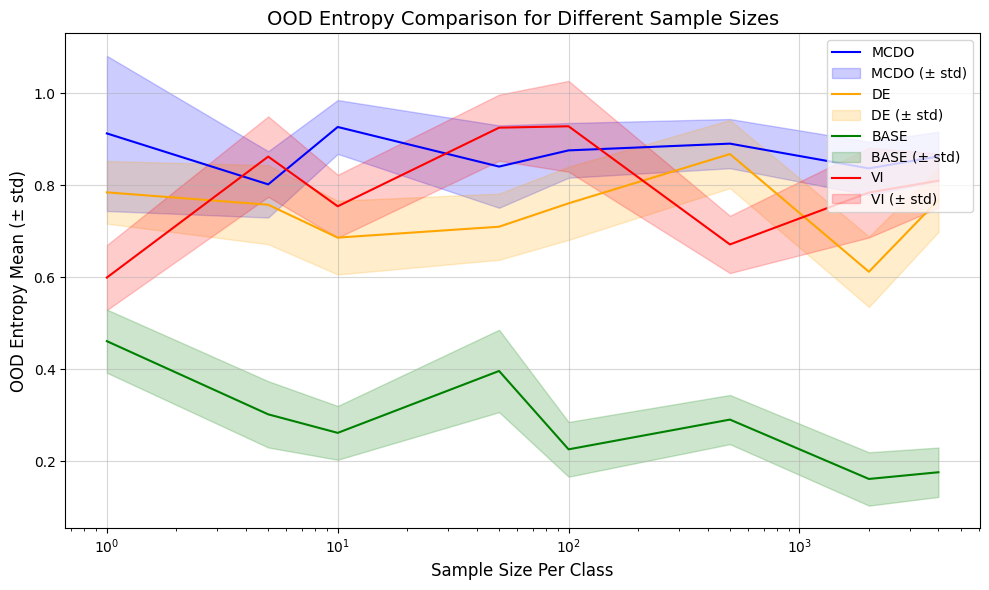

In [3]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the results folder
results_dir = "./results"

# Sample sizes used for training
sample_sizes = [1, 5, 10, 50, 100, 500, 2000, 4000]

# Models to include
models = ["MCDO", "DE", "BASE", "VI"]

# Initialize a dictionary to store the data
data = {model: {"ood_mean": [], "ood_std": []} for model in models}

# Load the results from the JSON files
for model in models:
    for size in sample_sizes:
        if model == "DE":
            # For DE, we average across the model indices
            ood_means = []
            ood_stds = []
            for idx in range(1, 6):  # Model indices for DE
                file_path = results_dir+ f"/{model}/results_{size}_samples_model_{idx}.json"
                if os.path.exists(file_path):
                    with open(file_path, "r") as f:
                        results = json.load(f)
                        ood_means.append(results["entropy"]["ood_mean"])
                        ood_stds.append(results["entropy"]["ood_std"])
            # Calculate overall mean and std
            if ood_means:
                data[model]["ood_mean"].append(np.mean(ood_means))
                data[model]["ood_std"].append(np.sqrt(np.mean(np.array(ood_stds) ** 2)))
        else:
            # For other models
            file_path = results_dir+ f"/{model}/results_{size}_samples.json"
            if os.path.exists(file_path):
                with open(file_path, "r") as f:
                    results = json.load(f)
                    data[model]["ood_mean"].append(results["entropy"]["ood_mean"])
                    data[model]["ood_std"].append(results["entropy"]["ood_std"])

# Plotting
plt.figure(figsize=(10, 6))

colors = {"MCDO": "blue", "DE": "orange", "BASE": "green", "VI": "red"}
for model in models:
    if data[model]["ood_mean"]:
        ood_mean = np.array(data[model]["ood_mean"])
        ood_std = np.array(data[model]["ood_std"])
        plt.plot(sample_sizes, ood_mean, label=model, color=colors[model])
        plt.fill_between(
            sample_sizes,
            ood_mean - ood_std,
            ood_mean + ood_std,
            alpha=0.2,
            color=colors[model],
            label=f"{model} (± std)"
        )

# Add labels, title, and legend
plt.xscale("log")
plt.xlabel("Sample Size Per Class", fontsize=12)
plt.ylabel("OOD Entropy Mean (± std)", fontsize=12)
plt.title("OOD Entropy Comparison for Different Sample Sizes", fontsize=14)
plt.legend(loc="upper right")
plt.grid(alpha=0.5)
plt.tight_layout()


plt.savefig("ood_entropy_comparison.png")
